This notebook imports population that was build using US_Population_By_State_Final.ipynb and then use the Gun_Sales data taken from https://github.com/singparvi/nics-firearm-background-checks. This source uses https://www.fbi.gov/services/cjis/nics database to collect the data and provide in a CSV format.

In [1]:
# import major libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import calendar
url = 'https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv'

df = pd.read_csv(url)

In [2]:
# Chaning month to datetime format as it is defined as object earlier
df['month'] =pd.to_datetime(df['month'])
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-11-01,Alabama,30694.0,561.0,27765.0,25924.0,1931.0,1519,0.0,32.0,15.0,1.0,2122.0,1152.0,14.0,24.0,0.0,0.0,0.0,0.0,42.0,33.0,9.0,0.0,1.0,0.0,91839
1,2020-11-01,Alaska,96.0,0.0,3474.0,3878.0,461.0,301,0.0,1.0,0.0,0.0,140.0,88.0,3.0,23.0,11.0,0.0,0.0,0.0,13.0,20.0,1.0,0.0,0.0,0.0,8510
2,2020-11-01,Arizona,7483.0,1172.0,25906.0,14698.0,2157.0,1604,0.0,6.0,6.0,2.0,924.0,334.0,6.0,104.0,8.0,1.0,0.0,0.0,18.0,14.0,0.0,0.0,0.0,1.0,54444
3,2020-11-01,Arkansas,4096.0,486.0,10069.0,12954.0,599.0,505,5.0,8.0,13.0,0.0,930.0,1078.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,14.0,1.0,0.0,0.0,0.0,30770
4,2020-11-01,California,28797.0,0.0,56793.0,37256.0,7391.0,0,0.0,0.0,0.0,0.0,328.0,217.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130793


In [3]:
# making separate columns for month and year
df['month'][0].year

{m: i for i, m in enumerate(calendar.month_abbr) if m}

def to_year(string):
    return string.year

def to_month(string):
    return string.month
df_new = df
df_new['year'] = df['month'].apply(to_year)
df_new['month'] = df['month'].apply(to_month)
df_new

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
0,11,Alabama,30694.0,561.0,27765.0,25924.0,1931.0,1519,0.0,32.0,15.0,1.0,2122.0,1152.0,14.0,24.0,0.0,0.0,0.0,0.0,42.0,33.0,9.0,0.0,1.0,0.0,91839,2020
1,11,Alaska,96.0,0.0,3474.0,3878.0,461.0,301,0.0,1.0,0.0,0.0,140.0,88.0,3.0,23.0,11.0,0.0,0.0,0.0,13.0,20.0,1.0,0.0,0.0,0.0,8510,2020
2,11,Arizona,7483.0,1172.0,25906.0,14698.0,2157.0,1604,0.0,6.0,6.0,2.0,924.0,334.0,6.0,104.0,8.0,1.0,0.0,0.0,18.0,14.0,0.0,0.0,0.0,1.0,54444,2020
3,11,Arkansas,4096.0,486.0,10069.0,12954.0,599.0,505,5.0,8.0,13.0,0.0,930.0,1078.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,14.0,1.0,0.0,0.0,0.0,30770,2020
4,11,California,28797.0,0.0,56793.0,37256.0,7391.0,0,0.0,0.0,0.0,0.0,328.0,217.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130793,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14570,11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1998
14571,11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361,1998
14572,11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408,1998
14573,11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241,1998


In [4]:
# Rearranging columns
column_list = df.columns.tolist()
df_new = df_new[['year','month','state','totals']]
df_new

,year,month,state,totals
0,2020,11,Alabama,91839
1,2020,11,Alaska,8510
2,2020,11,Arizona,54444
3,2020,11,Arkansas,30770
4,2020,11,California,130793
...,...,...,...,...
14570,1998,11,Virginia,24
14571,1998,11,Washington,361
14572,1998,11,West Virginia,408
14573,1998,11,Wisconsin,241


In [5]:
# find the number of unique value in a column 
df_new['state'].nunique()

55

In [6]:
# importing states codes for plotly
state_code_url = 'https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv'
state_codes = pd.read_csv(state_code_url)
state_codes = state_codes[['code', 'state']]
# df_new was 14575 rows × 28 columns

#merging guns_sales with state codes
guns_sales = pd.merge(df_new, state_codes, on = 'state')
# guns_sales is 13250 rows × 29 columns

condition = (guns_sales['year'] == 1998) | (guns_sales['year'] == 1999) | (guns_sales['year'] == 2000)
# removing the data for 1998, 1999 and 2000
guns_sales = guns_sales.drop(labels= guns_sales[condition].index, axis=0)
guns_sales = guns_sales[['year', 'month', 'state', 'totals', 'code']]
# guns_sales is now 11950 rows vs 13250 rows earlier and 98,99 and 00 year data is dropped
# along with not required columns
guns_sales


,year,month,state,totals,code
0,2020,11,Alabama,91839,AL
1,2020,10,Alabama,80934,AL
2,2020,9,Alabama,80478,AL
3,2020,8,Alabama,85347,AL
4,2020,7,Alabama,107490,AL
...,...,...,...,...,...
13219,2001,5,Wyoming,2338,WY
13220,2001,4,Wyoming,2390,WY
13221,2001,3,Wyoming,2713,WY
13222,2001,2,Wyoming,2598,WY


In [7]:
# Making a new column with code_year for df_new DF to merge population from us_pop
guns_sales['year'] = guns_sales['year'].apply(str)
guns_sales['code_year'] = guns_sales['code'] + guns_sales['year']
guns_sales

,year,month,state,totals,code,code_year
0,2020,11,Alabama,91839,AL,AL2020
1,2020,10,Alabama,80934,AL,AL2020
2,2020,9,Alabama,80478,AL,AL2020
3,2020,8,Alabama,85347,AL,AL2020
4,2020,7,Alabama,107490,AL,AL2020
...,...,...,...,...,...,...
13219,2001,5,Wyoming,2338,WY,WY2001
13220,2001,4,Wyoming,2390,WY,WY2001
13221,2001,3,Wyoming,2713,WY,WY2001
13222,2001,2,Wyoming,2598,WY,WY2001


In [8]:
# making a new column in guns_sales to match US_Population_1990-2020.csv generated from US_Population_By_State_Final.ipynb
guns_sales['month'] = guns_sales['month'].apply(str)
guns_sales['code'] = guns_sales['code'].apply(str)
guns_sales['year'] = guns_sales['year'].apply(str)
guns_sales['vlookup'] = guns_sales['code'] + "+" + guns_sales['year']   + "+" + guns_sales['month'] 
guns_sales

,year,month,state,totals,code,code_year,vlookup
0,2020,11,Alabama,91839,AL,AL2020,AL+2020+11
1,2020,10,Alabama,80934,AL,AL2020,AL+2020+10
2,2020,9,Alabama,80478,AL,AL2020,AL+2020+9
3,2020,8,Alabama,85347,AL,AL2020,AL+2020+8
4,2020,7,Alabama,107490,AL,AL2020,AL+2020+7
...,...,...,...,...,...,...,...
13219,2001,5,Wyoming,2338,WY,WY2001,WY+2001+5
13220,2001,4,Wyoming,2390,WY,WY2001,WY+2001+4
13221,2001,3,Wyoming,2713,WY,WY2001,WY+2001+3
13222,2001,2,Wyoming,2598,WY,WY2001,WY+2001+2


In [9]:
# importing US_Population_1990-2020.csv in which US population data was built from 1990-2000 
# using US_Population_By_State_Final.ipynb
us_pop_url = 'https://raw.githubusercontent.com/singparvi/US-Gun-Sales/main/US_Population.csv'
us_pop = pd.read_csv(us_pop_url)
us_annual_pop = us_pop[us_pop.code == 'USA']
us_annual_pop.drop(['code', 'month', 'vlookup'], axis = 1, inplace= True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
us_pop.drop(['code', 'year', 'month'], axis = 1, inplace = True)
us_pop

,population,vlookup
0,4817528.0,AL+2012+1
1,4785570.0,AL+2010+1
2,4801627.0,AL+2011+1
3,4757938.0,AL+2009+1
4,4833722.0,AL+2013+1
...,...,...
19423,322941311.0,USA+2016+12
19424,324985539.0,USA+2017+12
19425,326687501.0,USA+2018+12
19426,328239523.0,USA+2019+12


In [11]:
# merging the guns_sales and population DataFrame
guns_sales = guns_sales.merge(us_pop, on = 'vlookup')
guns_sales.drop(['code_year', 'vlookup'], axis = 1,inplace= True)

In [12]:
# Calculate gun_sales_per_100k
guns_sales['gun_sales_per_100k'] = guns_sales['totals'] * 1000 / guns_sales['population'] 
guns_sales.head()

,year,month,state,totals,code,population,gun_sales_per_100k
0,2020,11,Alabama,91839,AL,4926478.0,18.641918
1,2020,10,Alabama,80934,AL,4926478.0,16.428369
2,2020,9,Alabama,80478,AL,4926478.0,16.335808
3,2020,8,Alabama,85347,AL,4926478.0,17.324141
4,2020,7,Alabama,107490,AL,4926478.0,21.818833


In [13]:
# Changing month to int format
guns_sales['month'] = guns_sales['month'].apply(int)
guns_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11950 entries, 0 to 11949
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                11950 non-null  object 
 1   month               11950 non-null  int64  
 2   state               11950 non-null  object 
 3   totals              11950 non-null  int64  
 4   code                11950 non-null  object 
 5   population          11950 non-null  float64
 6   gun_sales_per_100k  11950 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 746.9+ KB


In [14]:
# change integer months to string months
import calendar

def month_int_to_str(integer):
    return calendar.month_name[integer]

guns_sales['month'] = guns_sales['month'].apply(month_int_to_str)

In [15]:
# Getting the annual sales of data and plotting it to see the trend
df_annual_data_bystate = pd.pivot_table(guns_sales, index = ['state','year',], values= 'totals', aggfunc= 'sum')
df_annual_data_bystate = df_annual_data_bystate.reset_index()

In [16]:
# another time in order to get a Data Frame of annual sales
df_annual_data_bystate = pd.pivot_table(df_annual_data_bystate, index = 'year', values= 'totals', aggfunc= 'sum')
df_annual_data_bystate = df_annual_data_bystate.reset_index()

In [17]:
# Changing year to int value and merging us_annual_gunsales_pop with us_annual_pop 
df_annual_data_bystate.year = df_annual_data_bystate.year.apply(int)
us_annual_gunsales_pop = df_annual_data_bystate.merge(us_annual_pop, on = 'year')
us_annual_gunsales_pop = us_annual_gunsales_pop.drop_duplicates()
us_annual_gunsales_pop = us_annual_gunsales_pop.rename(columns= {'totals': 'gun sales'})


In [18]:
## Installing chart_studio using bash

!pip install chart_Studio

In [19]:
# use US annual gunsales along with US annual population to plot
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
fig = px.bar(us_annual_gunsales_pop, x = 'year', y = 'gun sales', color = 'population', labels={'pop:population of US'}, 
             height= 900, title= 'US Annual Gun Sales and Population')
fig.update_xaxes(tickangle=90)
fig.update_layout(title_x = 0.5)
fig.show()
# uncomment to export the html file in local directory
# import plotly.io as pio
# pio.write_html(fig, file='Barplot_YoY_Gun_Sales_Population.html', auto_open=True)


Make DataFrame using pivot table so that months are removed and there is one total for guns sold in any year

In [20]:
# Making DF to have total annual sales condensed in one row per state for any year
ann_sales_pop_bystate = pd.pivot_table(guns_sales, index = ['year', 'state', 'code','population'], values='totals', aggfunc= 'sum')
ann_sales_pop_bystate = ann_sales_pop_bystate.reset_index()
# Calculate gun_sales_per_100k
ann_sales_pop_bystate['gun_sales_per_100k'] = ann_sales_pop_bystate['totals'] * 1000 / ann_sales_pop_bystate['population'] 
ann_sales_pop_bystate.head()

,year,state,code,population,totals,gun_sales_per_100k
0,2001,Alabama,AL,4467634.0,230187,51.523245
1,2001,Alaska,AK,633714.0,39959,63.055258
2,2001,Arizona,AZ,5273477.0,147582,27.985710
3,2001,Arkansas,AR,2691571.0,166062,61.697054
4,2001,California,CA,34479458.0,854569,24.784873


## Total Annual Gun Sales and Population of US States by Year Choropleth map

In [21]:
# for total guns taken into account

# plotting the figure with animation
fig = px.choropleth(ann_sales_pop_bystate, locations = 'code', scope ='usa', locationmode='USA-states', color= 'totals',
                    hover_name= 'population', hover_data=['population'], animation_frame= 'year', 
                    color_continuous_scale='Inferno', title = 'Total Annual Gun Sales and Population of US States by Year', height = 800
                    )
fig.update_layout(title_x = 0.5)
fig.show()

# uncomment to export the html file in local directory
# import plotly.io as pio
# pio.write_html(fig, file='Choropleth_Annual_Gun_Sales_Population.html', auto_open=True)

## Annual Gun Sales per 100k population of US States Choropleth map

In [22]:
# for PER 100k taken into account

# plotting the figure with animation
fig = px.choropleth(ann_sales_pop_bystate, locations = 'code', scope ='usa', locationmode='USA-states', color= 'gun_sales_per_100k',
                    hover_name= 'population', hover_data=['population'], animation_frame= 'year', 
                    color_continuous_scale='Inferno', title = 'Annual Gun Sales per 100k population of US States', height = 800
                    )
fig.update_layout(title_x = 0.5)
fig.show()
# uncomment to export the html file in local directory
# import plotly.io as pio
# pio.write_html(fig, file='Choropleth_Annual_Gun_Sales_100k.html', auto_open=True)

## Plotting states for 2019 to see how it looks

In [23]:
fig = px.bar(ann_sales_pop_bystate[ann_sales_pop_bystate.year == '2019'], x = 'code', y = 'totals', color = 'population', labels={'pop:population of US'}
             , height= 400, title= 'US Gun Sales for 2019 by State')
fig.update_layout(title_x = 0.5)
fig.show()

In [24]:
# upgrading plotly to remove path error in the following execution

!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.1)


## Treemap for the Population in US from 2001 to 2020.

In [25]:
# treemap for the population growth over the years
import plotly.express as px
import plotly.graph_objects as go

# We have a list for every day
# In your case will be gropuby('RuleName')
# here for every element d
# d[0] is the name(key) and d[1] is the dataframe
dfs = list(ann_sales_pop_bystate.groupby("year"))

first_title = dfs[0][0]
traces = []
buttons = []
for i,d in enumerate(dfs):
    visible = [False] * len(dfs)
    visible[i] = True
    name = d[0]
    traces.append(
        px.treemap(d[1],
                   path=['year', 'code', ],
                   values='population', title = 'US Population Treemap').update_traces(visible=True if i==0 else False).data[0]
    )
    buttons.append(dict(label=name,
                        method="update",
                        args=[{"visible":visible},
                              {"title":f"{name}"}]))

updatemenus = [{'active':0, "buttons":buttons}]

fig = go.Figure(data=traces,
                 layout=dict(updatemenus=updatemenus))
fig.update_layout(title=first_title, title_x=0.5)
fig.show()
# uncomment to export the html file in local directory
# import plotly.io as pio
# pio.write_html(fig, file='Treemap_US_Population.html', auto_open=True)

# Code to export to online portal
# uncomment to export the html file in chart_studio portal 
# import chart_studio.plotly as py
# py.plot(fig, filename= 'Treemap_US_Population', auto_open=True)

## Total Annual Gun Sales and Population of US States by Year Dropdown Menu

In [26]:
# bar plot for the guns sales per year by state
import plotly.express as px
import plotly.graph_objects as go

# We have a list for every day
# In your case will be gropuby('RuleName')
# here for every element d
# d[0] is the name(key) and d[1] is the dataframe
dfs = list(ann_sales_pop_bystate.groupby("year"))

first_title = dfs[0][0]
traces = []
buttons = []
for i,d in enumerate(dfs):
    visible = [False] * len(dfs)
    visible[i] = True
    name = d[0]
    traces.append(px.bar(d[1], x = 'code', y = 'totals', color = 'population', labels=dict(x="Fruit", y="Amount", color="Place"), height= 800).update_traces(visible=True if i==0 else False).data[0])
        # px.treemap(d[1],
        #            path=['year', 'code', ],
        #            values='population').update_traces(visible=True if i==0 else False).data[0]
        
  
    buttons.append(dict(label=name,
                        method="update",
                        args=[{"visible":visible},
                              {"title":f"{name}"}]))

updatemenus = [{'active':0, "buttons":buttons}]

fig = go.Figure(data=traces,
                 layout=dict(updatemenus=updatemenus))
fig.update_layout(title=first_title, title_x=0.5, title_text = 'Total Annual Gun Sales and Population of US States by Year ')
fig.show()
# uncomment to export the html file in local directory
# import plotly.io as pio
# pio.write_html(fig, file='Barplot_Annual_Gun_Sales_Population.html', auto_open=True)

## Annual Gun Sales per 100k population of US States by Year Dropdown Menu

In [27]:
# bar plot for the guns sales per 100k people by state in any year
import plotly.express as px
import plotly.graph_objects as go

# We have a list for every day
# In your case will be gropuby('RuleName')
# here for every element d
# d[0] is the name(key) and d[1] is the dataframe
dfs = list(ann_sales_pop_bystate.groupby("year"))

first_title = dfs[0][0]
traces = []
buttons = []
for i,d in enumerate(dfs):
    visible = [False] * len(dfs)
    visible[i] = True
    name = d[0]
    traces.append(px.bar(d[1], x = 'code', y = 'gun_sales_per_100k', color = 'population', width= 200, height= 200).update_traces(visible=True if i==0 else False).data[0])
        # px.treemap(d[1],
        #            path=['year', 'code', ],
        #            values='population').update_traces(visible=True if i==0 else False).data[0]
        
  
    buttons.append(dict(label=name,
                        method="update",
                        args=[{"visible":visible},
                              {"title":f"{name}"}]))

updatemenus = [{'active':0, "buttons":buttons}]

fig = go.Figure(data=traces,
                 layout=dict(updatemenus=updatemenus))
fig.update_layout(title=first_title, title_x=0.5, title_text = 'Annual Gun Sales per 100k population of US States by Year ')
fig.show()

# uncomment to export the html file in local directory
# import plotly.io as pio
# pio.write_html(fig, file='Barplot_Annual_Gun_Sales_100k.html', auto_open=True)

The following section will do statistical tests to find the correlation between population and sales.

In [28]:
# Convert population and year to int format
ann_sales_pop_bystate['population'] = ann_sales_pop_bystate['population'].apply(int)
ann_sales_pop_bystate['year'] = ann_sales_pop_bystate['year'].apply(int)
ann_sales_pop_bystate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                1000 non-null   int64  
 1   state               1000 non-null   object 
 2   code                1000 non-null   object 
 3   population          1000 non-null   int64  
 4   totals              1000 non-null   int64  
 5   gun_sales_per_100k  1000 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



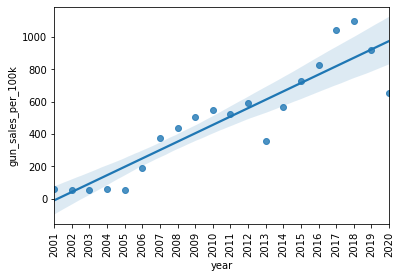

The correlation coefficient for gun_sales_per_100k and year for Kentucky state is 0.9133219539010778 
 
 
                            OLS Regression Results                            
Dep. Variable:     gun_sales_per_100k   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     90.54
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           1.91e-08
Time:                        08:09:55   Log-Likelihood:                -126.25
No. Observations:                  20   AIC:                             256.5
Df Residuals:                      18   BIC:                             258.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [29]:
## Followig data analysis is for Kentucky State

# plotting KY_Data as regression
KY_data = ann_sales_pop_bystate[ann_sales_pop_bystate.code == 'KY']
sns.regplot(KY_data['year'], KY_data['gun_sales_per_100k'])
xvalue = KY_data['year']
plt.xticks(xvalue, rotation=90)
plt.show()

# finding the correlation coefficient for KY_data
r = np.corrcoef(KY_data['year'], KY_data['gun_sales_per_100k'])
print ('The correlation coefficient for gun_sales_per_100k and year for Kentucky state is', r[0,1], '\n \n ')

# running the ols model of regression fitting on KY_data
from statsmodels.formula.api import ols
model = ols('gun_sales_per_100k ~ year', data = KY_data).fit()
print (model.summary())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



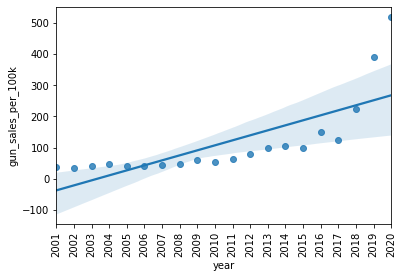

The correlation coefficient for gun_sales_per_100k and year for Illinois state is 0.7488117089577838 
 
 
                            OLS Regression Results                            
Dep. Variable:     gun_sales_per_100k   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     22.98
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           0.000145
Time:                        08:09:55   Log-Likelihood:                -116.55
No. Observations:                  20   AIC:                             237.1
Df Residuals:                      18   BIC:                             239.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [30]:
## Followig data analysis is for Illinois State

# plotting IL_Data as regression
IL_data = ann_sales_pop_bystate[ann_sales_pop_bystate.code == 'IL']
sns.regplot(IL_data['year'], IL_data['gun_sales_per_100k'])
xvalue = IL_data['year']
plt.xticks(xvalue, rotation=90)
plt.show()

# finding the correlation coefficient for IL_data
r = np.corrcoef(IL_data['year'], IL_data['gun_sales_per_100k'])
print ('The correlation coefficient for gun_sales_per_100k and year for Illinois state is', r[0,1], '\n \n ')

# running the ols model of regression fitting on IL_data
from statsmodels.formula.api import ols
model = ols('gun_sales_per_100k ~ year', data = IL_data).fit()
print (model.summary())


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



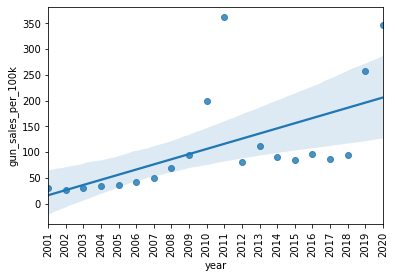

The correlation coefficient for gun_sales_per_100k and year for Utah state is 0.5853629266154521 
 
 
                            OLS Regression Results                            
Dep. Variable:     gun_sales_per_100k   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     9.383
Date:                Thu, 24 Dec 2020   Prob (F-statistic):            0.00670
Time:                        08:09:55   Log-Likelihood:                -115.97
No. Observations:                  20   AIC:                             235.9
Df Residuals:                      18   BIC:                             237.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [31]:
## Followig data analysis is for Utah State

# plotting UT_Data as regression
UT_data = ann_sales_pop_bystate[ann_sales_pop_bystate.code == 'UT']
sns.regplot(UT_data['year'], UT_data['gun_sales_per_100k'])
xvalue = UT_data['year']
plt.xticks(xvalue, rotation=90)
plt.show()

# finding the correlation coefficient for UT_data
r = np.corrcoef(UT_data['year'], UT_data['gun_sales_per_100k'])
print ('The correlation coefficient for gun_sales_per_100k and year for Utah state is', r[0,1], '\n \n ')

# running the ols model of regression fitting on UT_data
from statsmodels.formula.api import ols
model = ols('gun_sales_per_100k ~ year', data = UT_data).fit()
print (model.summary())